# [Paired Sample t-test](https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/cd386635-4bb8-4317-a87e-f944b673f5f9/a6d22abc-d149-4b8b-b596-647821495692)  

[Crime Datset](https://www.sheffield.ac.uk/mash/statistics/datasets)

The two-sample t-test has the following features:

- it works also with a small dataset as it is in this case
- the samples need not be normally distributed

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# How to suppress Pandas Future warning?
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
crime_data = pd.read_csv('datasets/Crime_R.csv')
crime_data.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [5]:
crime_data.shape

(47, 27)

In [10]:
crime_expenditure_0_10 = crime_data[['ExpenditureYear0','ExpenditureYear10']]
crime_expenditure_0_10.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


The following histograms show that the expenditure pro capita on police enforcement for each US state is not normally distributed - it is not bell-shaped. It shows instead that the $40 to $60 pro capita is the most frequent value, although this is a value on the lower end of the spectrum rather than the middle of the range as expected in the case of a normal distribution.

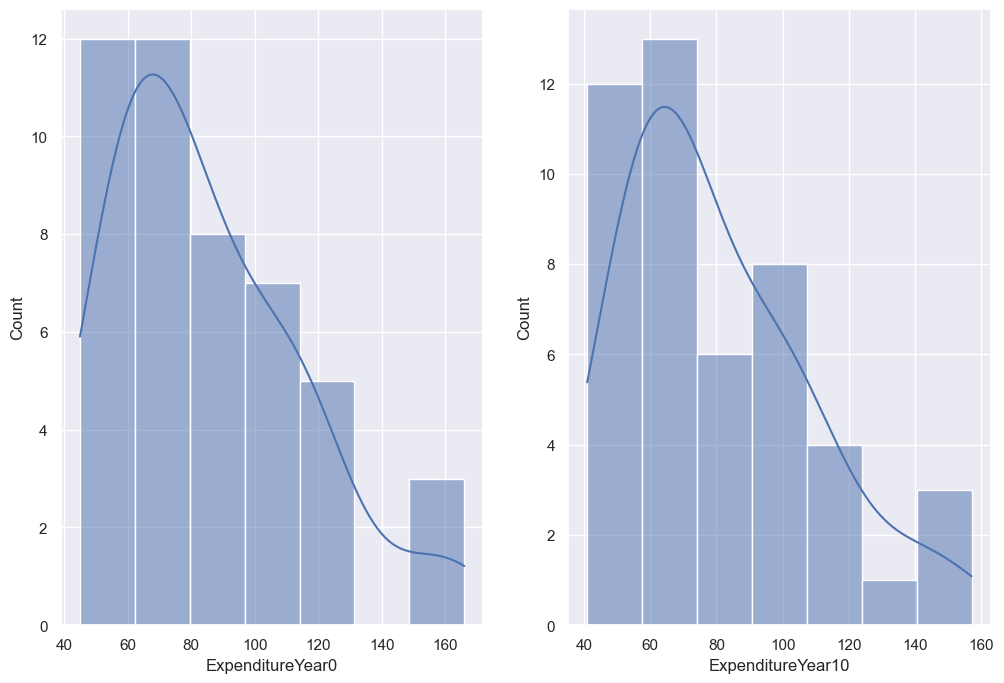

In [13]:
fig, axs = plt.subplots(figsize = (12,8), ncols=2)
sns.histplot(crime_data['ExpenditureYear0'], kde = True, ax = axs[0])
sns.histplot(crime_data['ExpenditureYear10'], kde = True, ax = axs[1])
plt.show()

another way to show that the data is not normally distributed is to use a proplot with dist="norm" so that the data and a read line are displayed together in the same plot. The red line displays the theoretical normal distribution for data in the same range.
It is evident that the data departs significantly from 

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([ 45,  46,  47,  51,  55,  56,  57,  58,  58,  58,  61,  62,  63,
          63,  65,  66,  67,  69,  71,  72,  74,  75,  75,  78,  81,  82,
          82,  82,  87,  90,  90,  95,  97,  97, 103, 106, 109, 109, 113,
         115, 118, 121, 123, 128, 149, 160, 166], dtype=int64)),
 (29.41216

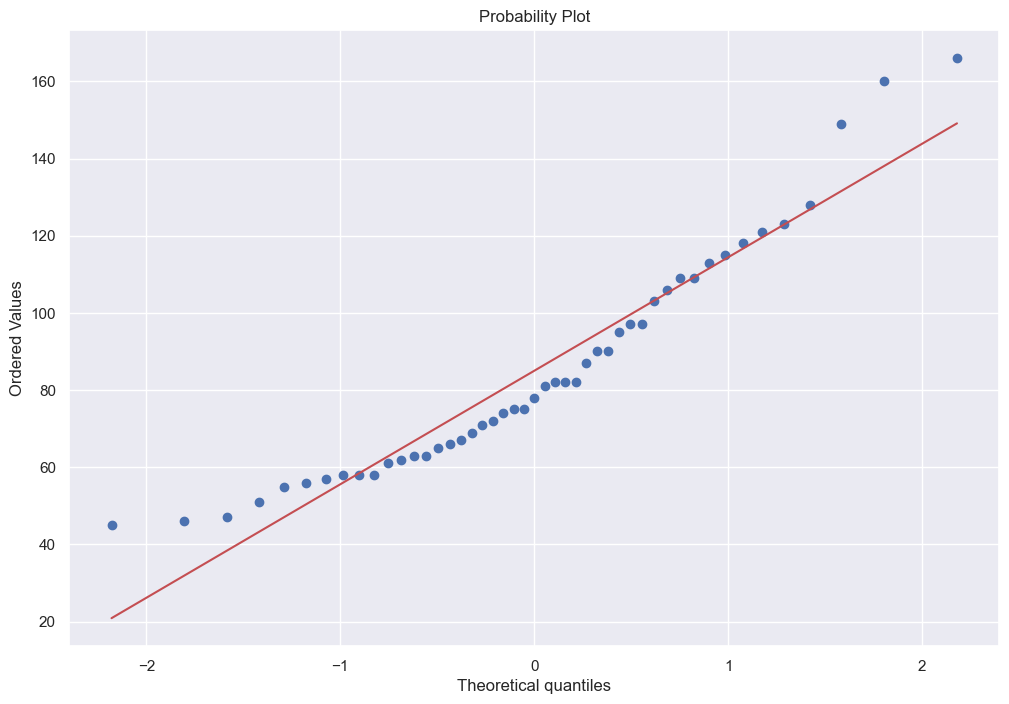

In [20]:
plt.figure(figsize = (12,8))
stats.probplot(crime_data['ExpenditureYear0'], dist = "norm", plot=plt)